In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
df = pd.read_parquet('bts_faa_coords.parquet')

In [3]:
df.isna().sum()

Year                                   0
Quarter                                0
Month                                  0
DayofMonth                             0
DayOfWeek                              0
                                      ..
Origin_LONGITUDE                       0
Dest_DISPLAY_AIRPORT_NAME              0
Dest_DISPLAY_AIRPORT_CITY_NAME_FULL    0
Dest_LATITUDE                          0
Dest_LONGITUDE                         0
Length: 108, dtype: int64

In [4]:
airlines = ['AA','AS','B6','DL','F9','HA','MQ','NK','OO','UA','WN','9E','G4','OH','YX']
#years = [2015,2016,2017,2018,2019] #two much data to run

df_2019 = df[(df['Reporting_Airline'].isin(airlines)) &
             #(df['Year'].isin(years)) &
             (df['Year']==2019) &
             (df['Cancelled']==0) &
             (df['Diverted']==0)].copy()
del df #free up memory

In [14]:
delay_mean = df_2019.groupby(['Reporting_Airline']).agg({
    'Reporting_Airline': 'count',    
    'CarrierDelay': 'mean',
    'WeatherDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean'

}
).rename(columns = {'Reporting_Airline': 'Total'}).reset_index().sort_values('Total', ascending = False)
delay_mean

,Reporting_Airline,Total,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
13,WN,1375343,3.078293,0.256809,1.500208,0.033439,4.221254
4,DL,1004024,3.543054,0.665010,2.741980,0.008795,2.926173
1,AA,946500,4.715984,0.693438,3.089447,0.020580,5.623376
11,OO,819994,5.631864,1.375411,2.904470,0.017890,5.929415
12,UA,634358,3.458878,0.972052,5.023307,0.002860,6.717125
14,YX,321889,2.701397,0.625828,4.899736,0.012072,5.151633
8,MQ,314662,3.168609,1.150562,3.612839,0.009594,5.670697
3,B6,297190,7.001184,0.522131,4.598799,0.023662,8.422891
10,OH,281647,3.545814,0.776287,2.157761,0.015548,7.036237
2,AS,265338,2.631425,0.283736,3.390118,0.026065,3.339616


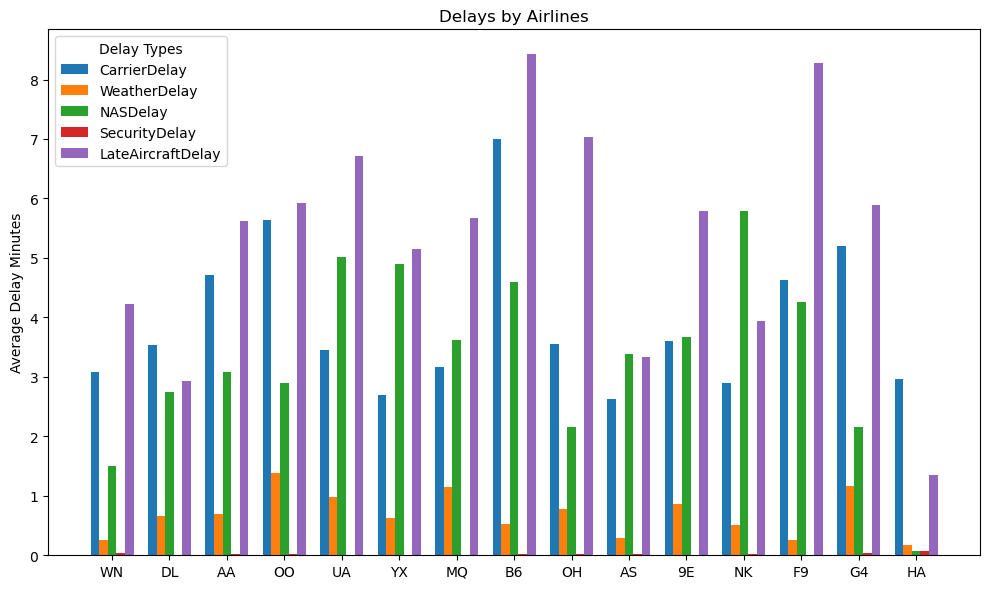

In [45]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar
bar_width = 0.15
index = np.arange(len(delay_mean['Reporting_Airline']))

# Loop through the delay columns and create side-by-side bars
for i, delay in enumerate(delays):
    ax.bar(index + (i * bar_width), delay_mean[delay], bar_width, label=delay)

ax.set_ylabel('Average Delay Minutes')
ax.set_title('Delays by Airlines')
ax.set_xticks(index + bar_width * (len(delays) - 1) / 2)
ax.set_xticklabels(delay_mean['Reporting_Airline'])
ax.legend(title='Delay Types')

plt.tight_layout()
plt.show()

In [41]:
print('Delay Counts')
print('NASDelay: ' + str('{:,}'.format((df_2019['NASDelay'] != 0).sum())))
print('LateAircraftDelay: ' + str('{:,}'.format((df_2019['LateAircraftDelay'] != 0).sum())))
print('CarrierDelay: ' + str('{:,}'.format((df_2019['CarrierDelay'] != 0).sum())))
print('WeatherDelay: ' + str('{:,}'.format((df_2019['WeatherDelay'] != 0).sum())))
print('SecurityDelay: ' + str('{:,}'.format((df_2019['SecurityDelay'] != 0).sum())))



Delay Counts
NASDelay: 718,379
LateAircraftDelay: 695,836
CarrierDelay: 654,583
WeatherDelay: 78,441
SecurityDelay: 4,458


In [43]:
# Function to count non-zero values
def count_non_zero(series):
    return (series != 0).sum()
# Group by 'Reporting_Airline' and apply the custom function to calculate non-zero counts
non_zero_counts = df_2019.groupby(['Reporting_Airline']).agg({
    'Reporting_Airline': 'count',
    'CarrierDelay': count_non_zero,
    'WeatherDelay': count_non_zero,
    'NASDelay': count_non_zero,
    'SecurityDelay': count_non_zero,
    'LateAircraftDelay': count_non_zero
}).rename(columns={'Reporting_Airline': 'Total'}).reset_index().sort_values('Total', ascending=False)
non_zero_counts

,Reporting_Airline,Total,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
13,WN,1375343,152661,6440,96443,1190,155375
4,DL,1004024,74525,9525,83736,150,60922
1,AA,946500,110913,13053,107333,840,100269
11,OO,819994,51445,11496,78864,348,84200
12,UA,634358,54555,10172,82709,45,62527
14,YX,321889,20634,3466,41522,161,30597
8,MQ,314662,26246,7519,41225,162,37162
3,B6,297190,50802,2021,38677,291,41386
10,OH,281647,28118,4725,27713,276,34297
2,AS,265338,15582,1447,32927,300,17643


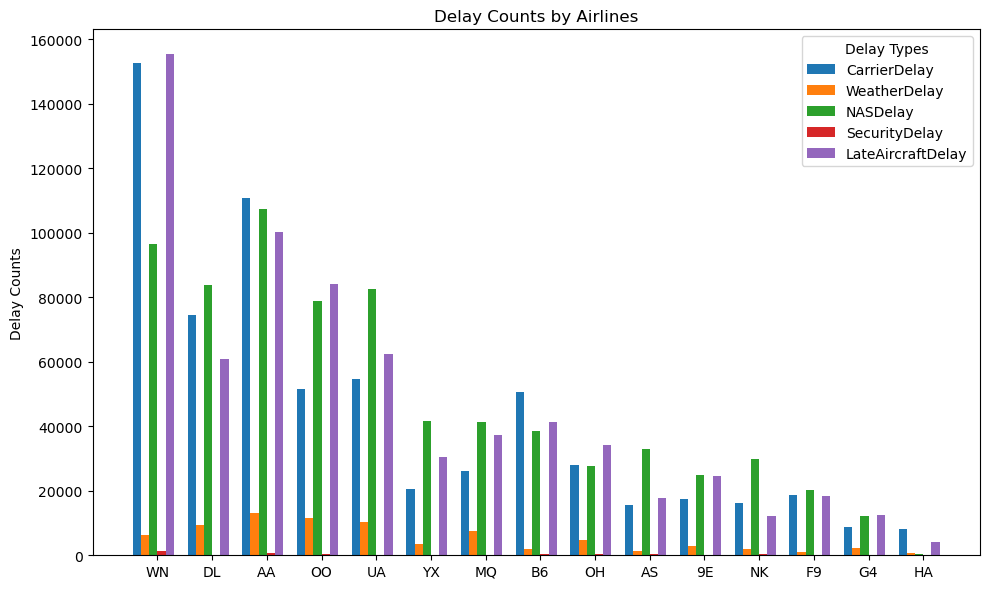

In [46]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Number of delay types
n = len(non_zero_counts.columns) - 2  # Subtract 2 for 'Reporting_Airline' and 'Total' columns

# Width of each bar
width = 0.15

# Create a bar for each airline and each delay type
x = range(len(non_zero_counts))
for i in range(n):
    plt.bar([pos + i * width for pos in x], non_zero_counts.iloc[:, i + 2], width, label=non_zero_counts.columns[i + 2])


plt.ylabel('Delay Counts')
plt.title('Delay Counts by Airlines')
plt.xticks([pos + width * (n / 2) for pos in x], non_zero_counts['Reporting_Airline'])
plt.legend(title='Delay Types', loc='upper right')

plt.tight_layout()
plt.show()